#todo

Use the mall customer data for a linear regression.

Try to predict spending score based on age, income and sex (take each one of them separately, then two at a time, then all three).

Should be straight-forward.

Steps:
    1. split the data for train, validation and test.
    2. apply oneHotEncoder on sex
    3. Standardize age and income
    4. Do regression.
    5. Test. 
   


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

print("All imported")

All imported


In [2]:
#read data
#print(pwd)
df = pd.read_csv("Data/Mall_Customers.csv")
print("shape:", df.shape)
print("columns:", df.columns)

shape: (200, 5)
columns: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [3]:
#change column names
print("Old columns: ", df.columns)
df.columns = ["CustomerID", "Gender", "Age", "Income", "Score"]
print("New columns: ", df.columns)


Old columns:  Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
New columns:  Index(['CustomerID', 'Gender', 'Age', 'Income', 'Score'], dtype='object')


In [4]:
#expore data
df.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#check data types
df.dtypes

CustomerID     int64
Gender        object
Age            int64
Income         int64
Score          int64
dtype: object

In [6]:
#check if there is any null
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [7]:
#first few
df.head(5)

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
#do some simple dist plots just to see how the values are distributed

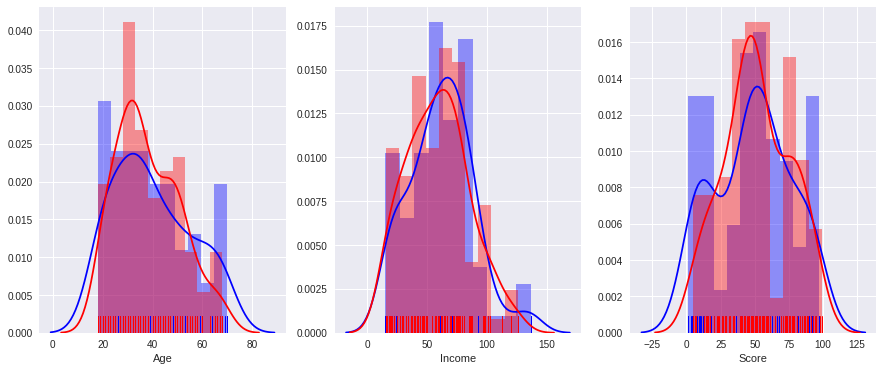

In [8]:
columns = df.columns #['CustomerID', 'Gender', 'Age', 'Income', 'Score']

plt.figure(figsize = (15,6))

count = 1
for column in ['Age', 'Income', 'Score']:

    X_m = df[column][df["Gender"] == "Male" ] 
    #print("shape", X_m.shape)

    X_f = df[column][df["Gender"] == "Female" ] 
    #print("shape", X_f.shape)
    
    plt.subplot(1,3,count)
    count += 1
    
    sns.distplot(X_m, bins=10, hist = True, kde=True, norm_hist = True, rug = True, color = "blue")
    sns.distplot(X_f, bins=10, hist = True, kde=True, norm_hist = True, rug = True, color = "red")





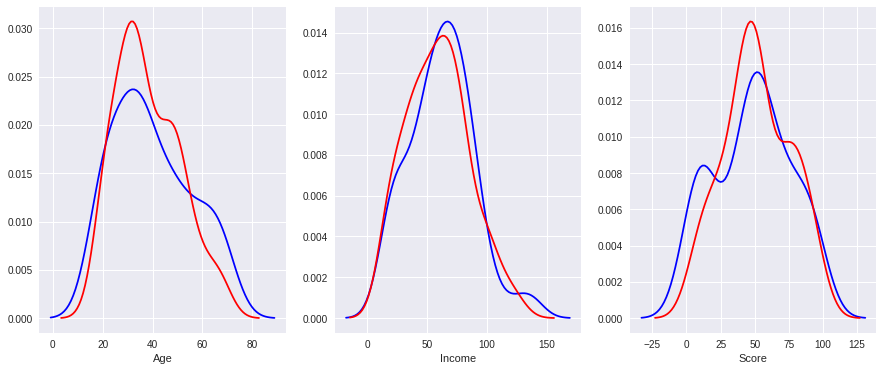

In [9]:
#okay, make a cleaner plot.

plt.figure(figsize = (15,6))

count = 1
for column in ['Age', 'Income', 'Score']:

    X_m = df[column][df["Gender"] == "Male" ] 
    #print("shape", X_m.shape)

    X_f = df[column][df["Gender"] == "Female" ] 
    #print("shape", X_f.shape)
    
    plt.subplot(1,3,count)
    count += 1
    
    sns.distplot(X_m, bins=10, hist = False, kde=True, norm_hist = True, rug = False, color = "blue")
    sns.distplot(X_f, bins=10, hist = False, kde=True, norm_hist = True, rug = False, color = "red")


In [10]:
#get X and y
X = df.iloc[:, 1:4]
print("X shape:",X.shape)
print(X.head(5))

y = df.iloc[:,4]
print("y shape:",y.shape)
print(y.head(5))



X shape: (200, 3)
   Gender  Age  Income
0    Male   19      15
1    Male   21      15
2  Female   20      16
3  Female   23      16
4  Female   31      17
y shape: (200,)
0    39
1    81
2     6
3    77
4    40
Name: Score, dtype: int64


In [11]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

print("X_train sample:")
print(X_train.head(5))

print("X_test sample:")
print(X_test.head(10))

X_train shape: (150, 3)
X_test shape: (50, 3)
y_train shape: (150,)
y_test shape: (50,)
X_train sample:
     Gender  Age  Income
114  Female   18      65
173    Male   36      87
5    Female   22      17
126    Male   43      71
117  Female   49      65
X_test sample:
     Gender  Age  Income
95     Male   24      60
15     Male   22      20
30     Male   60      30
158    Male   34      78
128    Male   59      71
115  Female   19      65
69   Female   32      48
170    Male   40      87
174  Female   52      88
45   Female   24      39


In [107]:
# do data pre-procesing. One-hot encoding for sex, normalization for age and income.
# lbe = LabelEncoder()
# X_train["Gender"] = lbe.fit_transform(X_train["Gender"])
# print("categories:", lbe.classes_)
# print("X_train now:") 
# print(X_train.head(10))

# #print("labels shape:", labels.shape)
# #print(labels[:5])

# ohe = OneHotEncoder(categorical_features=[0])
# one_hot = ohe.fit_transform(X_train).toarray()
#     #this returns a numpy array. Can be converted to dataframe if required.

In [12]:
#this is simpler
X_train = pd.get_dummies(X_train)
print("shape:", X_train.shape)
print(X_train.head(5))

shape: (150, 4)
     Age  Income  Gender_Female  Gender_Male
114   18      65              1            0
173   36      87              0            1
5     22      17              1            0
126   43      71              0            1
117   49      65              1            0


In [13]:
X_test = pd.get_dummies(X_test)
print("shape:", X_test.shape)
print(X_test.head(5))

shape: (50, 4)
     Age  Income  Gender_Female  Gender_Male
95    24      60              0            1
15    22      20              0            1
30    60      30              0            1
158   34      78              0            1
128   59      71              0            1


In [14]:
#normalize age and income
stdsc = StandardScaler()
X_train["Age_norm"] = stdsc.fit_transform(X_train["Age"])
X_train["Income_norm"] = stdsc.fit_transform(X_train["Income"])
print("shape:", X_train.shape)
print(X_train.head(5))

shape: (150, 6)
     Age  Income  Gender_Female  Gender_Male  Age_norm  Income_norm
114   18      65              1            0 -1.489026     0.167640
173   36      87              0            1 -0.206611     0.990871
5     22      17              1            0 -1.204045    -1.628502
126   43      71              0            1  0.292105     0.392158
117   49      65              1            0  0.719577     0.167640


In [15]:
X_test["Age_norm"] = stdsc.transform(X_test["Age"])
X_test["Income_norm"] = stdsc.transform(X_test["Income"])
print("shape:", X_test.shape)
print(X_test.head(5))

shape: (50, 6)
     Age  Income  Gender_Female  Gender_Male  Age_norm  Income_norm
95    24      60              0            1 -1.366564    -0.019458
15    22      20              0            1 -1.441404    -1.516243
30    60      30              0            1 -0.019458    -1.142047
158   34      78              0            1 -0.992368     0.654095
128   59      71              0            1 -0.056878     0.392158


In [ ]:
#ok, do linear regression

#we ought to read chap 10 for regression. Need more details.

#Also, instead of trying to predict the spending score directly, we may wanto to have five categories (0-40, 40-80, ...)
#and try to use a classifier to predict proper spending group. 

In [20]:
X_train_std = X_train.iloc[:, 2:]
print("X_train_std shape:",X_train_std.shape)
print("Columns:", X_train_std.columns)

X_test_std = X_test.iloc[:, 2:]
print("X_test_std shape:",X_test_std.shape)
print("Columns:", X_test_std.columns)


X_train_std shape: (150, 4)
Columns: Index(['Gender_Female', 'Gender_Male', 'Age_norm', 'Income_norm'], dtype='object')
X_test_std shape: (50, 4)
Columns: Index(['Gender_Female', 'Gender_Male', 'Age_norm', 'Income_norm'], dtype='object')


In [22]:
#get a regression model. Fit.
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train_std, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
#since there are multiple features in X, we can't visualize the regression line on a 2D plot.
#Lets use reidual plot instead to visualize its effectiveness.

y_train_pred = slr.predict(X_train_std)
y_test_pred = slr.predict(X_test_std)

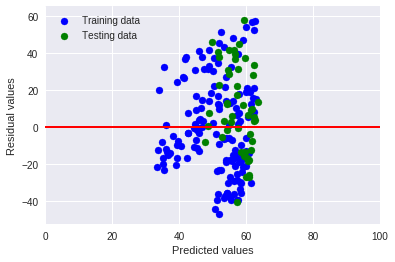

In [26]:
#so we are plotting the actual prediction value on the x and their difference with expected value on the y.
plt.scatter(y_train_pred, y_train_pred-y_train, c = "blue", marker = "o", label = "Training data")
plt.scatter(y_test_pred, y_test_pred-y_test, c = "green", marker = "o", label = "Testing data")
plt.xlabel("Predicted values")
plt.ylabel("Residual values")
plt.legend(loc = "upper left")
plt.hlines(y=0, xmin = 0, xmax = 100, lw = 2, color = "red")
plt.xlim([0, 100])
plt.show()

#so this shows that all the values predicted were in range 40 to 60, which is clearly wrong. 
#The real values were between 0 to 100. So the residuals ar rather big, -50 to 60. Sad.

In [29]:
# Also, check the Mean-Squared-Error: MSE
from sklearn.metrics import mean_squared_error
print("MSE train: {:.3f} test: {:.3f}".format(mean_squared_error(y_train,  y_train_pred), mean_squared_error(y_test,  y_test_pred)))

#MSE train: 624.103 test: 621.942. Both are huge. We are not overfitting, but the model is crap.

MSE train: 624.103 test: 621.942


In [30]:
#R2 score, which is baiscally the standard version of MSE. A value of 1 means perfect fit. 0 is crap.
from sklearn.metrics import r2_score
print("R^2 score train: {:.3f} test {:.3f}".format(r2_score(y_train,  y_train_pred), r2_score(y_test,  y_test_pred)))

#R^2 score train: 0.089 test -0.056
#As said, they are super crap

R^2 score train: 0.089 test -0.056


In [31]:
#Because we don't have a overfitting problem, no point of trying to regularize.
#So, no Ridge (L1), Lasso (L2) or ElasticNet (hybrid)


In [42]:
#Lets try some polynomyal regression then. Not sure if they would be any better, but let's try.
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree = 2)
X_train_quad = quadratic.fit_transform(X_train_std)
print("X_train_quad shape:", X_train_quad.shape) #(150, 15) #4 original features, 4 sqaures, 3+2+1=6 six xy permutation terms, 1 x0 term.  
X_test_quad = quadratic.fit_transform(X_test_std)
print("X_test_quad shape:", X_test_quad.shape) #(50, 15) #4 original features, 4 sqaures, 3+2+1=6 six xy permutation terms, 1 x0 term.  


X_train_quad shape: (150, 15)
X_test_quad shape: (50, 15)


In [43]:
poly = LinearRegression()
poly.fit(X_train_quad, y_train)

y_train_pred_poly = poly.predict(X_train_quad)
y_test_pred_poly = poly.predict(X_test_quad)

print("MSE train: {:.3f} test: {:.3f}".format(mean_squared_error(y_train,  y_train_pred_poly), mean_squared_error(y_test,  y_test_pred_poly)))
print("R^2 score train: {:.3f} test {:.3f}".format(r2_score(y_train,  y_train_pred_poly), r2_score(y_test,  y_test_pred_poly)))

#slight improvement, but still REALLY crap. 
#MSE train: 613.923 test: 632.390
#R^2 score train: 0.104 test -0.074

MSE train: 613.923 test: 632.390
R^2 score train: 0.104 test -0.074


In [44]:
#At this point, it is safe to assume that predicting spending score by these three features is impossible.
#This data set is only suitable for clustering. Inside each cluster, we may be able to predict the score.

In [ ]:
#Next:
#We can check how regression works on the features individually. (Age, Income). Of course it wont be fuitful.

#We can consider each cluster independently and try to do regression inside the cluster. 
#But what practical purpose does it have? None.

#So a more interesting one could be to get the data clustered already, and try to use a classifier to predict 
#the cluseter from the features. This can be doable. A simple logistic regression can work. Or a Dense layer in Keras.
